# 🧪 PIP INSTALL
Instalar pacotes: Autodistill, GroundedSAM, YOLOv8, Supervision e Roboflow


In [ ]:
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
supervision==0.9.0 \
roboflow

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.8 MB/s eta 0:00:00


# 🗂️ IMPORT
**NOTE**: Bibliotecas principais como autodistill (CaptionOntology, GroundedSAM e YOLOv8) para lidar com rotulagem automatica e detecção de objetos


In [ ]:
import os
import cv2
import supervision as sv
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM
from autodistill_yolov8 import YOLOv8
from IPython.display import Image

# 🖼️ PREPARANDO DADOS

### Carregando imagens

Definindo o diretorio atual e vizualizando

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


Cria um diretório chamado `images` no dict `HOME`, para carregar as imagens atraves do GitHub


In [ ]:
!mkdir {HOME}/images
!git clone https://github.com/vitorAugusto2/tcc-a2d2.git
!mv {HOME}/tcc-a2d2/images/* {HOME}/images/
!rm -rf {HOME}/tcc-a2d2

Cloning into 'tcc-a2d2'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 29.97 MiB | 23.66 MiB/s, done.


### Exibir amostra de imagem nao rotulada

In [ ]:
IMAGE_DIR_PATH = f"{HOME}/images"

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png"])

print(f"Quantidades de imagens: {len(image_paths)}")

Quantidades de imagens: 10


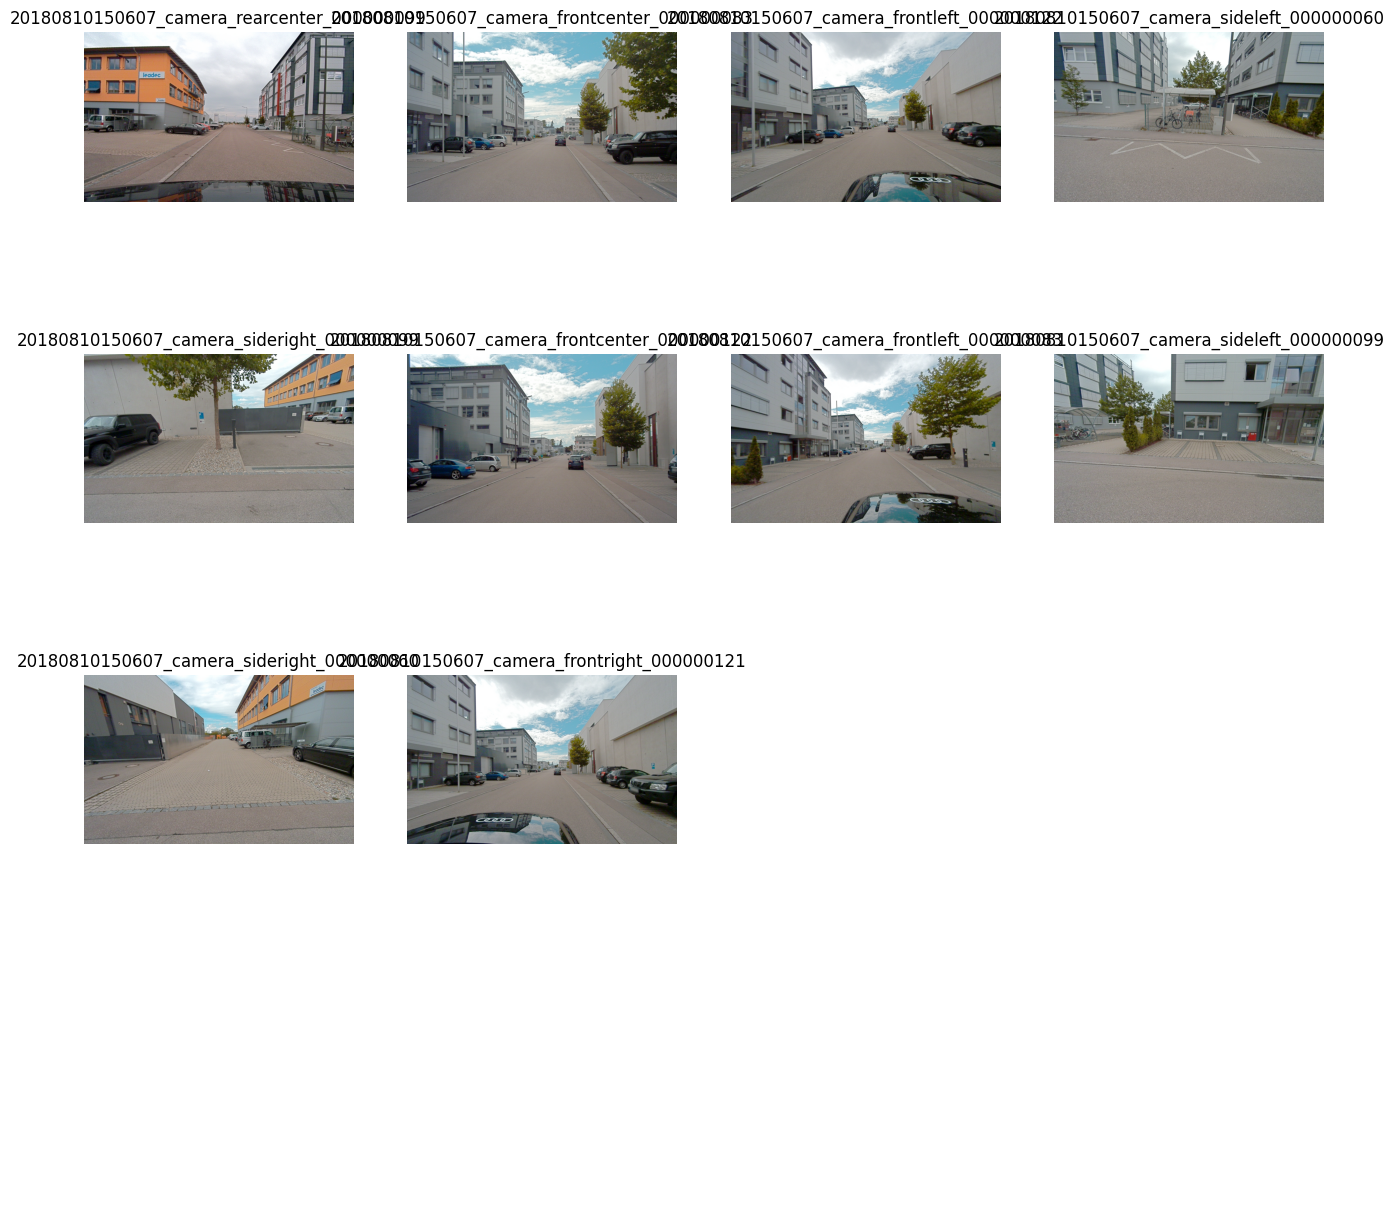

In [ ]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

# 🔪 AUTODISTILL: ROTULO AUTOMATICO

### Definir ontologia

**Ontologia** - uma Ontologia define como seu Modelo Base é solicitado, o que seu Conjunto de Dados descreverá e o que seu Modelo Alvo irá prever. Uma ontologia simples é a CaptionOntology que solicita um modelo base com legendas de texto e as mapeia para nomes de classes.

In [ ]:
"""
  Ontology: como o modelo base é solicitado
  Descreve o que voce realmente ve no conjunto de dados e no que deseja treinar
  seu modelo destino

  Lancar os prompts e classes para gerar as mascaras de segmentacao
    -> (prompt : class)
"""

ontology=CaptionOntology({
    "car": "car"#,
    #"building": "building",
    #"tree": "tree"
})

### Iniciar modelo base e rótulo automático

**Ontologia** - define como seu Modelo Base é solicitado, o que seu Conjunto de Dados descreverá e o que seu Modelo Alvo irá prever. Uma ontologia simples é aquela CaptionOntologyque solicita um modelo base com legendas de texto e os mapeia para nomes de classes.
- Uma ontologia em Computação é um modelo de dados que representa um conjunto de conceitos dentro de um domínio e os relacionamentos entre estes.

In [ ]:
DATASET_DIR_PATH = f"{HOME}/dataset" # diretorio de treinamento do dataset

In [ ]:
# Modelo base é iniciado por ontology
base_model = GroundedSAM(ontology=ontology) # modelo base: GroundedSAM
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,      # entrada de dados
    extension=".png",                 # extensao da imagem .png
    output_folder=DATASET_DIR_PATH)   # armazena a saida dos dados rotulados

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)


final text_encoder_type: bert-base-uncased



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Labeling /content/images/20180810150607_camera_rearcenter_000000099.png:   0%|          | 0/10 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
Labeling /content/images/20180810150607_camera_frontcenter_000000083.png:  10%|█         | 1/10 [03:04<27:40, 184.51s/it]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain curren

Labeled dataset created - ready for distillation.


### Exibir amostra do conjunto de dados

**Conjunto de dados/dataset** - dados rotulados automaticamente que pode ser usado para treinar um modelo de destino, como por exemplo YOLOv8. É a saída gerada por um Modelo Base.

In [ ]:
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/dataset/train/labels" # dados de rotulagem das imagens treinadas
IMAGES_DIRECTORY_PATH = f"{HOME}/dataset/train/images"      # imagens de treino rotuladas
DATA_YAML_PATH = f"{HOME}/dataset/data.yaml"                # arquivo formato YOLO (.yaml -> id, x, y, largura, altura)

**NOTA**: a quantidade de imagens total é dividida em `train` e `valid`

In [ ]:
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset) # quantidade de imagens de treinamento

8

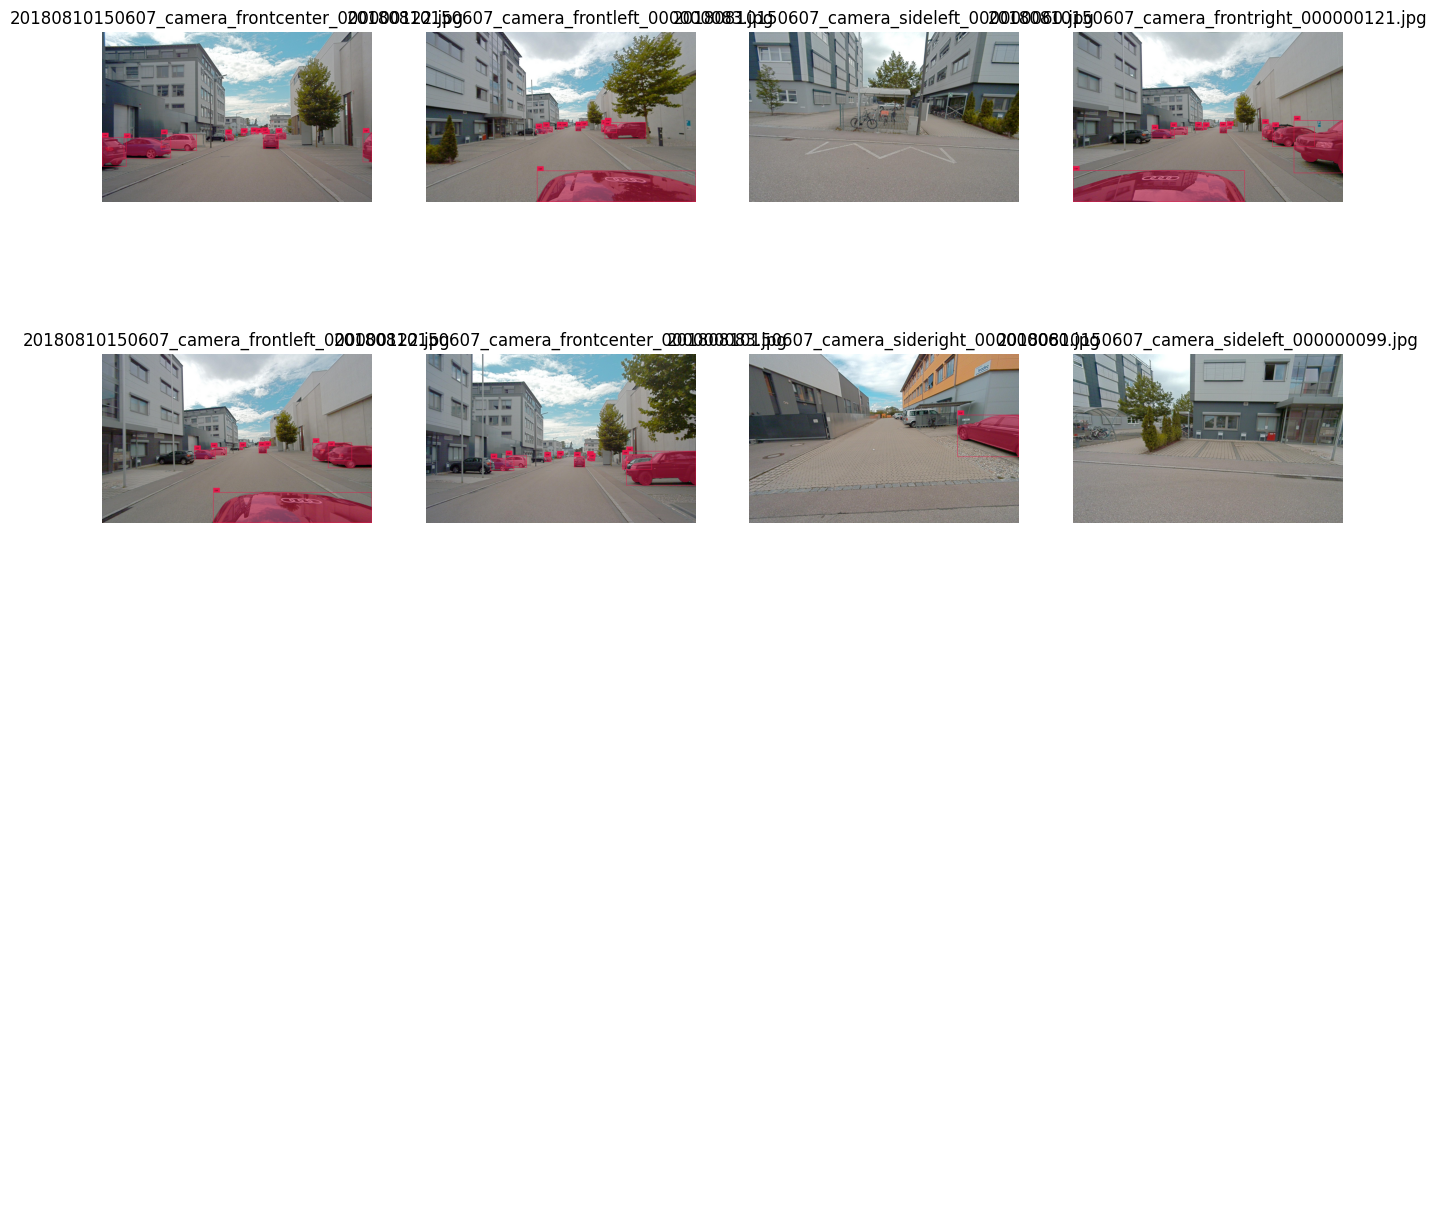

In [ ]:
"""
  Exemplos de imagens; Loop for em execucao com todos os parametros que criam
  essa imagens de anotacao com mascara de segmentacao e anotador de caixa de
  supervisao; e tambem dados demograficos para tracar nossa grade de imagens
"""

SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)

# 🚘YOLOV8


### Treinamento o modelo
**Modelo de destino** – é um modelo supervisionado que consome um conjunto de dados e gera um modelo destilado que está pronto para implantação. Os modelos de destino geralmente são pequenos, rápidos e ajustados para executar muito bem uma tarefa específica (mas não generalizam muito além das informações descritas em seu conjunto de dados).

**NOTA**: A interface de linha de comando YOLO (CLI) permite comandos simples de linha única sem a necessidade de um ambiente Python. CLI não requer personalização ou código Python . Podes simplesmente executar todas as tarefas a partir do terminal com o comando yolo comanda.

Ultralytics yolo utiliza a seguinte sintaxe:
```python
  yolo TASK MODE ARGS

  Where   TASK (optional) is one of [detect, segment, classify]
          MODE (required) is one of [train, val, predict, export, track]
          ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
```

In [ ]:
%cd {HOME}

!yolo \
task=detect \
mode=train \
model=yolov8n.pt \
data={DATASET_DIR_PATH}/data.yaml \
epochs= 20 \
imgsz=640

/content
100% 6.23M/6.23M [00:00<00:00, 83.6MB/s]
New https://pypi.org/project/ultralytics/8.1.37 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=Fa

### Validando o modelo de treinamento
Fornece um conjunto robusto de ferramentas e métricas para avaliar o desempenho dos teus modelos de deteção de objectos
- Precisão e Ajuste de hiperparâmetros

**NOTA**: Os arquivos de treinamento foram gerados e armazenados no diretorio `runs`.

In [ ]:
!yolo \
task=detect \
mode=val \
model={HOME}/runs/detect/train/weights/best.pt \
data={DATASET_DIR_PATH}/data.yaml

2024-03-29 15:36:32.344103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 15:36:32.344167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 15:36:32.345674: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.81 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00

### Exibir resultados de treinamento e validacao

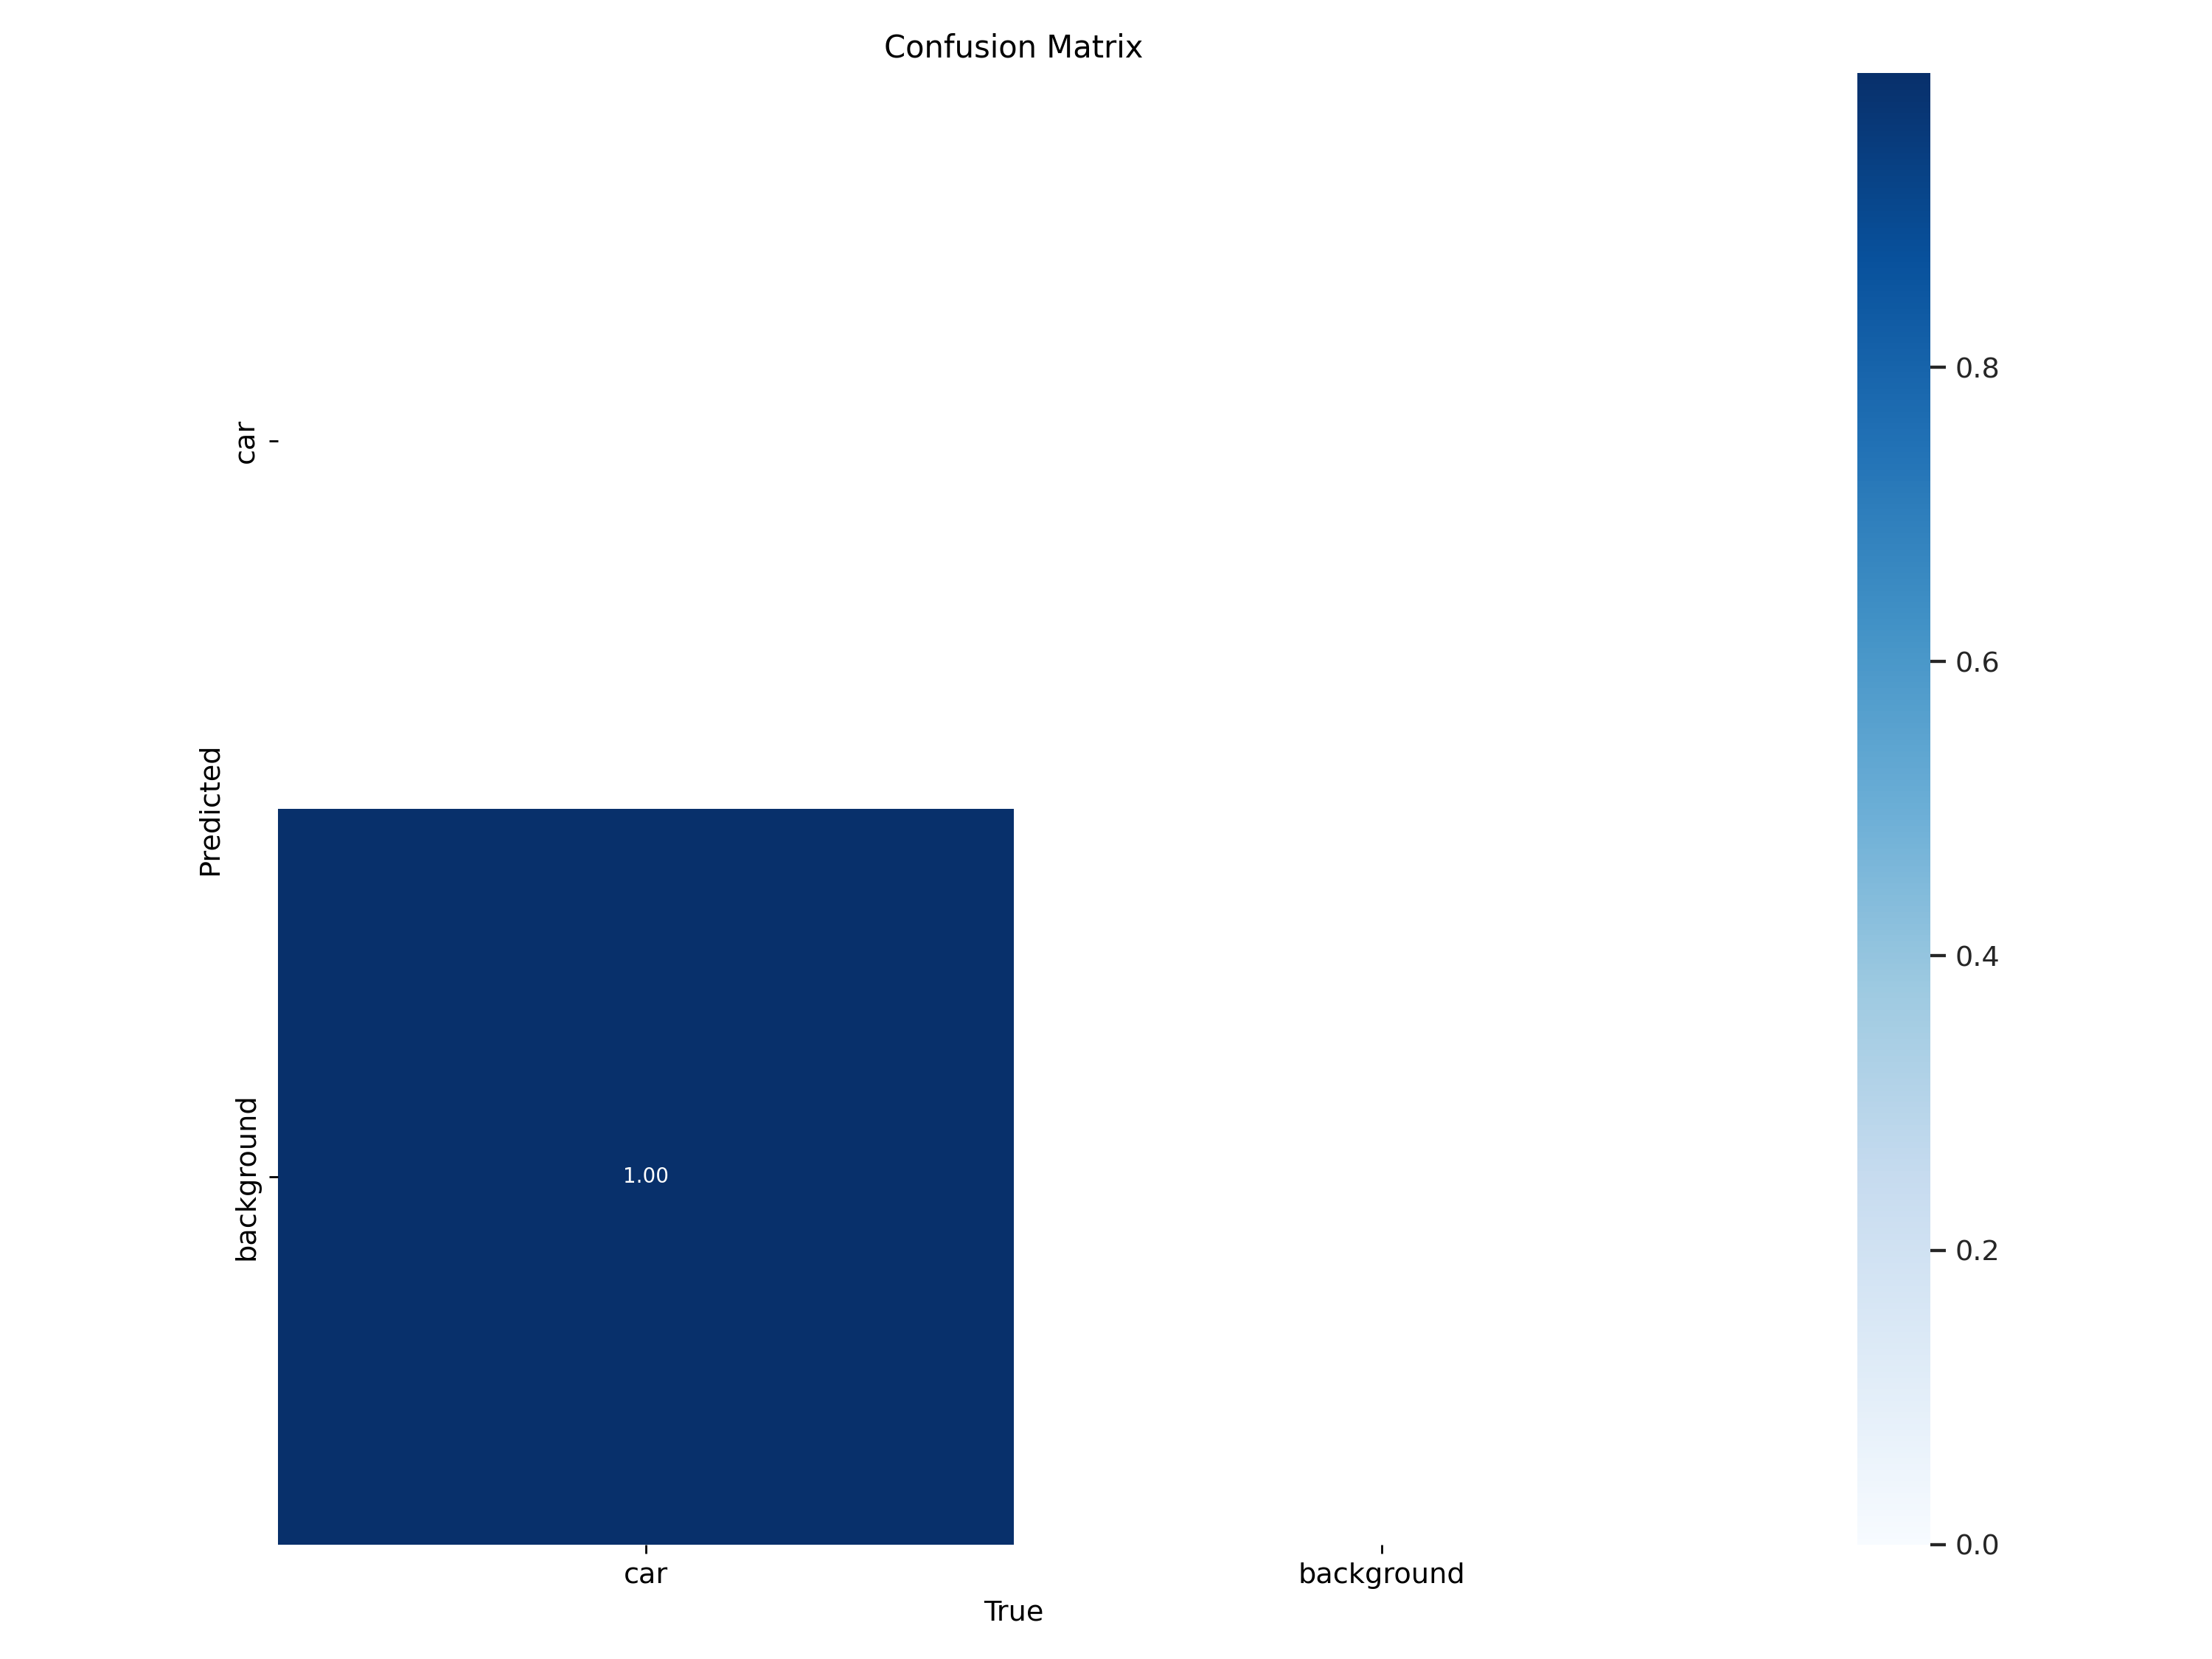

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

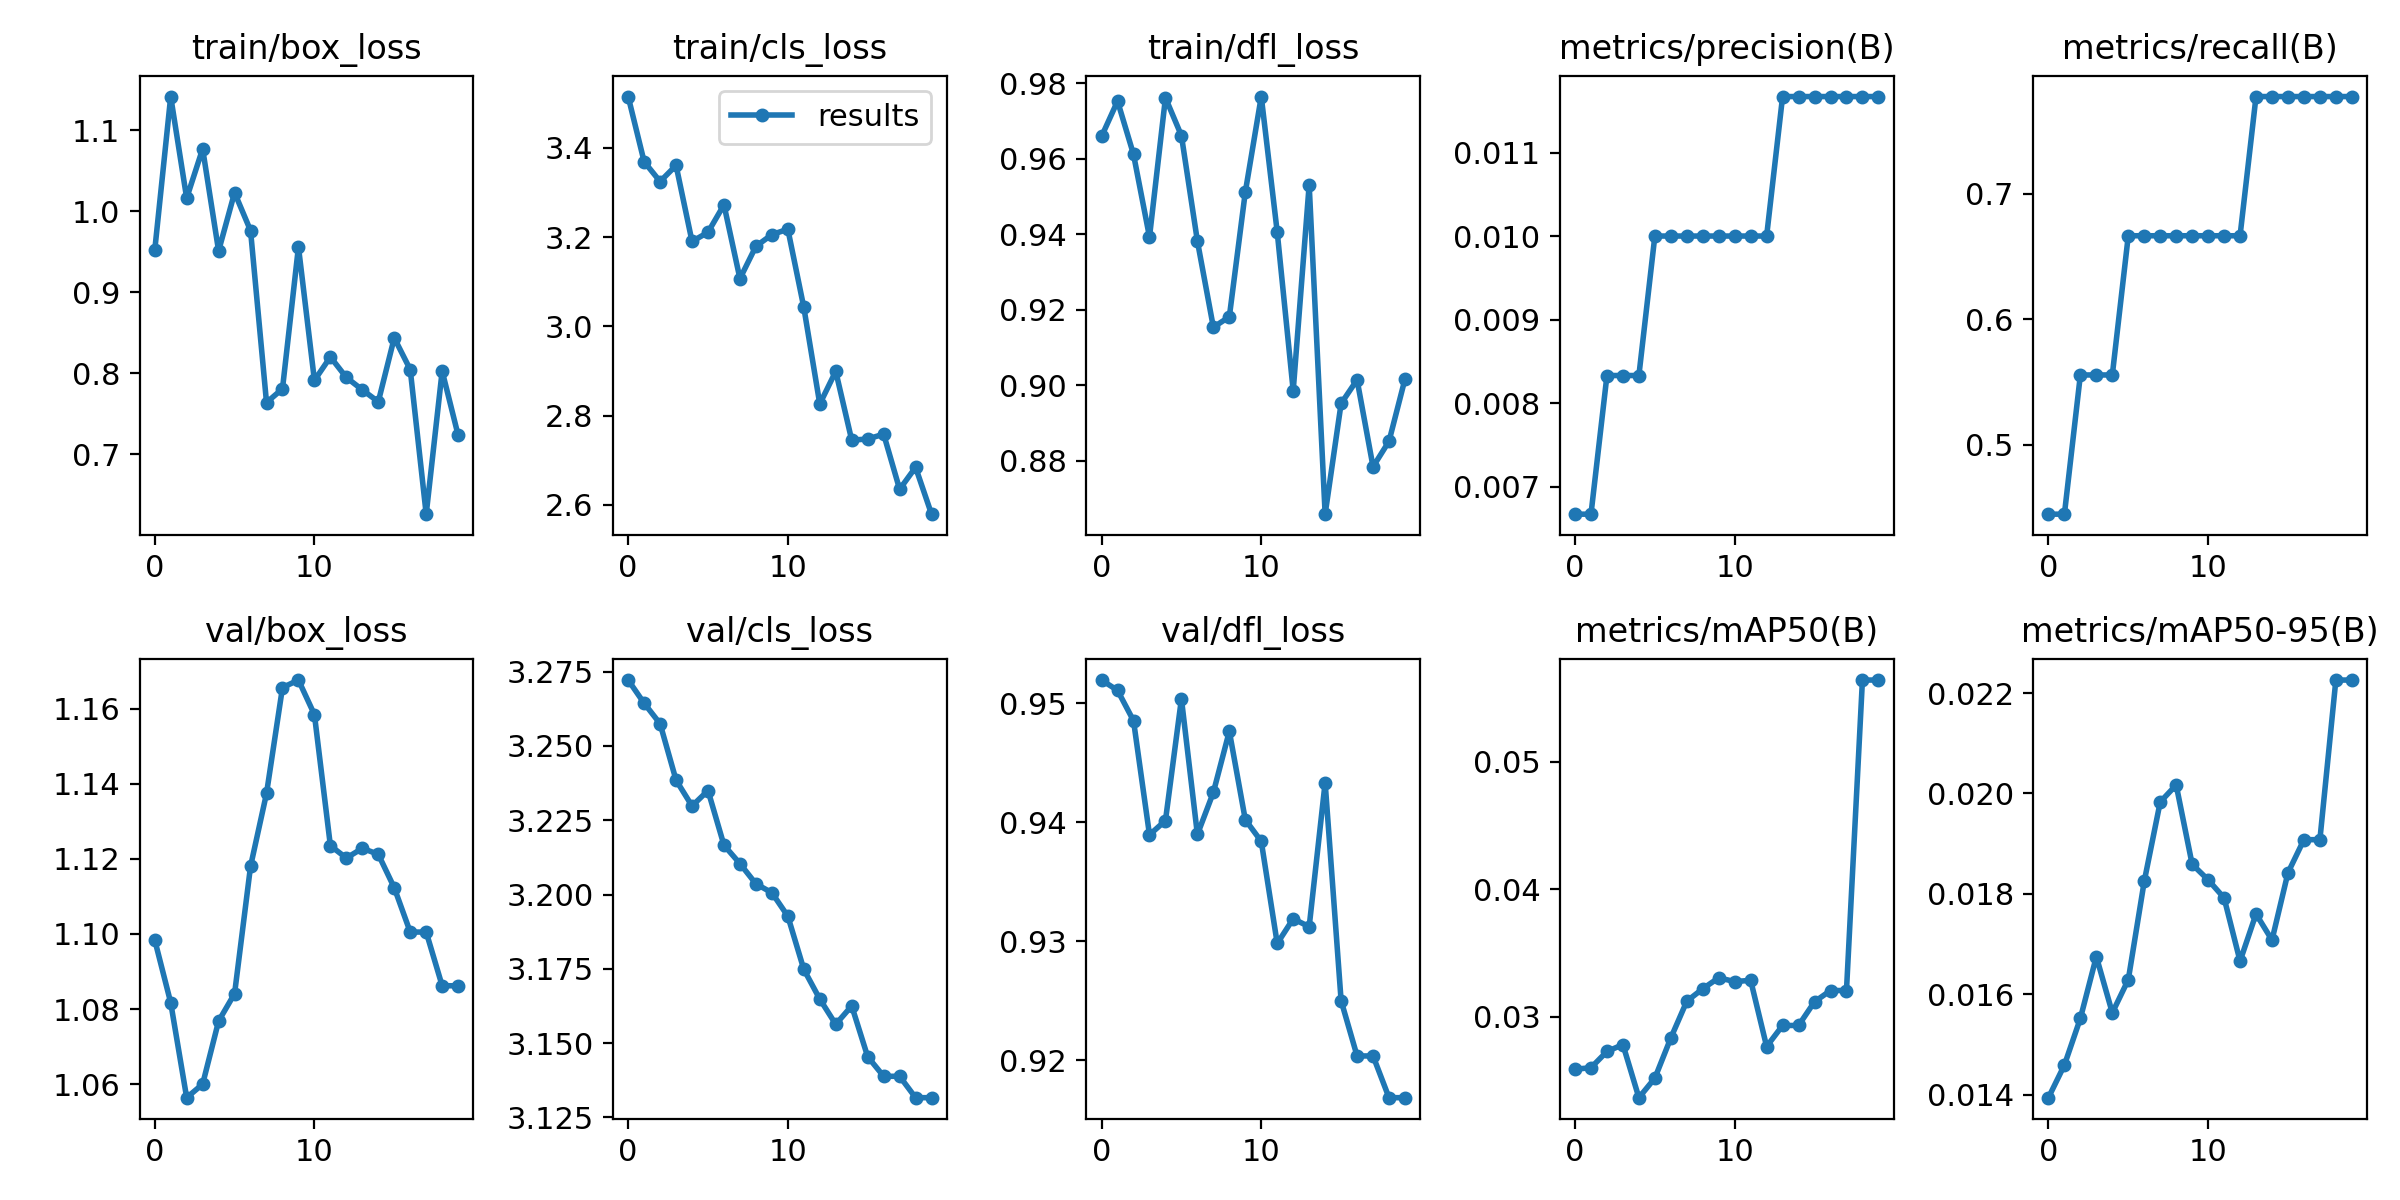

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

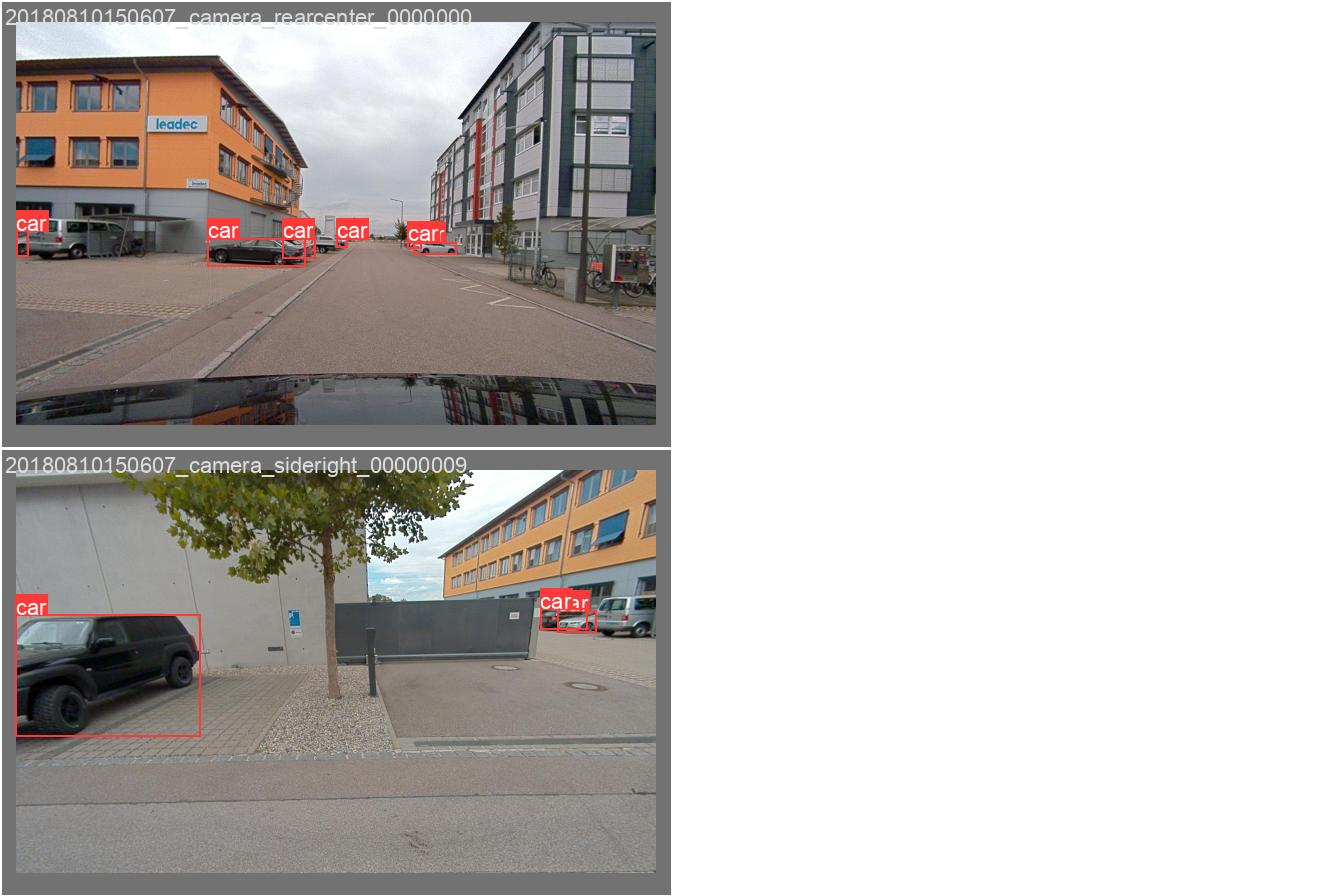

In [ ]:
Image(filename=f'{HOME}/runs/detect/val/val_batch0_labels.jpg', width=600)